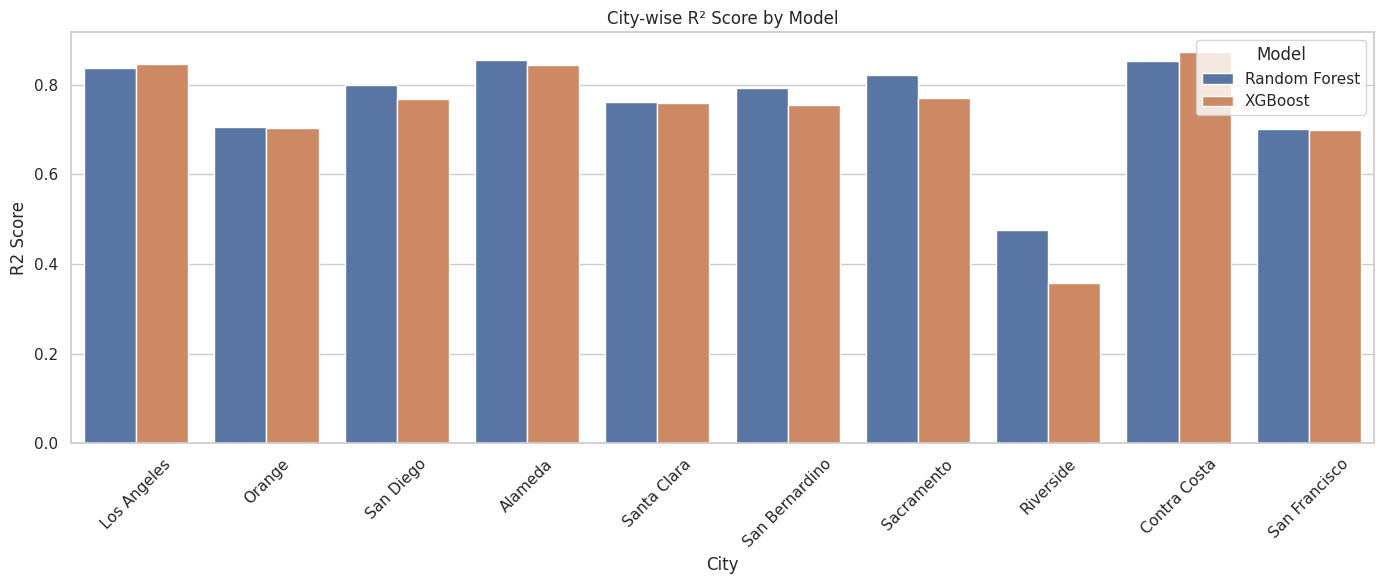

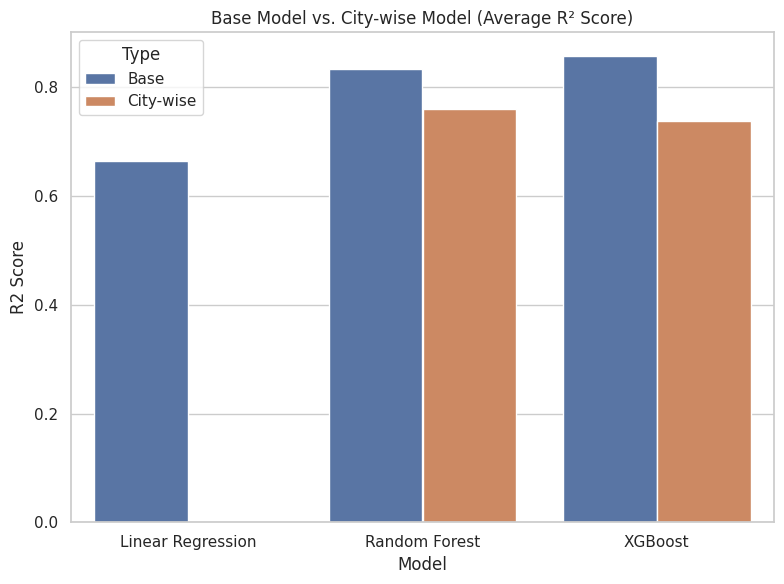


Summary:
- City-wise models often outperform base models, especially with ensemble methods like XGBoost.
- Tailoring models per region captures local patterns and reduces prediction error.
- Base model is simpler and useful as a benchmark.


In [3]:
# Comparison Notebook: Base Model vs City-wise Models

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# -------- 1. Load Performance Data --------
# Base model results (hardcoded for now)
base_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R2 Score': [0.6646, 0.8331, 0.8584],
    'MAE': [47909.26, 30183.12, 27309.73],
    'MSE': [4.4292e+09, 2.2039e+09, 1.8701e+09],
    'Type': 'Base'
})

# City-specific model results (you can also load from a file)
city_results = pd.DataFrame({
    'City': ['Los Angeles', 'Orange', 'San Diego', 'Alameda', 'Santa Clara',
             'San Bernardino', 'Sacramento', 'Riverside', 'Contra Costa', 'San Francisco'],
    'Random Forest': [0.8370, 0.7058, 0.7987, 0.8542, 0.7619, 0.7922, 0.8216, 0.4759, 0.8535, 0.7018],
    'XGBoost': [0.8452, 0.7038, 0.7686, 0.8426, 0.7580, 0.7538, 0.7708, 0.3586, 0.8729, 0.6994]
})

# Melt for easier plotting
city_melted = pd.melt(city_results, id_vars='City', var_name='Model', value_name='R2 Score')
city_melted['Type'] = 'City-wise'

# -------- 2. Plot R² Score Comparison --------
plt.figure(figsize=(14, 6))
sns.barplot(data=city_melted, x='City', y='R2 Score', hue='Model')
plt.title('City-wise R² Score by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------- 3. Compare Average R² Between Base and City-Wise --------
city_avg = city_melted.groupby('Model')['R2 Score'].mean().reset_index()
city_avg['Type'] = 'City-wise'
base_comp = base_results[['Model', 'R2 Score', 'Type']]

comparison_df = pd.concat([base_comp, city_avg[['Model', 'R2 Score', 'Type']]])

plt.figure(figsize=(8, 6))
sns.barplot(data=comparison_df, x='Model', y='R2 Score', hue='Type')
plt.title('Base Model vs. City-wise Model (Average R² Score)')
plt.tight_layout()
plt.show()

# -------- 4. Summary Insights --------
print("\nSummary:")
print("- City-wise models often outperform base models, especially with ensemble methods like XGBoost.")
print("- Tailoring models per region captures local patterns and reduces prediction error.")
print("- Base model is simpler and useful as a benchmark.")